# Estimation of object temperature

### Joule heat
$$ Q = RI^2t $$  
where   
Q: Heating value (J), t: Time (sec), I: Current (A), R: Resistance (Ohm)


### Newton's law of cooling
$$ -\frac{dQ}{dt} = \alpha S(T - T_m)$$  
where   
Q: Heating value (J), t: Time (sec), alpha: Heat transfer coefficient (J/(sec m2 K)), T: tempereture of the object (K), T_m: ambient tempereture (K)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Parameter setting

x = 10/10**3 #[m]
y = 40/10**3 #[m]
z = 100/10**3 #[m]
Mass = 50/(10**3) #[kg]
alpha =10#4*1.16279 #[J/(sec m2 K)]
C = 1000#4.184*10**3 #[J/kg/K]
t = 0 # [sec]
T_m = 25 # [deg.C]
T_m += 273 # [K]
Current = 5# [A]
Resistance = 0.1 #[Ohm]
d_t = 1 #[sec]


In [6]:
# Temperature simulation

Surface_area = x*y*2 + y*z*2 + z*x*2 #[m2]
t_x = [0]
d_Q_list = [0]
T = [T_m]
T_degC = [T_m-273]
#T.append(T_m)
t = 0

for i in range(1800):
    t = i/60
    t_x.append(t)
    
    Joule_heat = (Current)**2 * (Resistance) * d_t
    Cooling_Newton = alpha * Surface_area * (T[i-1] - T_m) * d_t
    d_Q = Joule_heat - Cooling_Newton
    d_T = d_Q / (C * Mass) 
    d_Q_list.append(T[i-1] - T_m)
    T.append(T[i-1] + d_T)
    T_degC.append(T[i-1] + d_T - 273)


(25, 60)

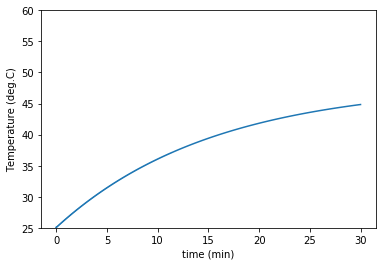

In [7]:
# Output figure

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_x, T_degC, label='Temperature')
ax.set(ylabel='Temperature (deg.C)', xlabel='time (min)')
ax.set_ylim(25, 60)